In [78]:
import pandas as pd
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
warnings.filterwarnings("ignore")

In [79]:
url = r'E:\MSC\E-commerce_data.xlsx'
customers = pd.read_excel(url, sheet_name = 'customers')
genders = pd.read_excel(url, sheet_name = 'genders')
cities = pd.read_excel(url, sheet_name = 'cities')
transactions = pd.read_excel(url, sheet_name = 'transactions')
branches = pd.read_excel(url, sheet_name = 'branches')
merchants = pd.read_excel(url, sheet_name = 'merchants')

In [80]:
customers

,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1
...,...,...,...,...
995,996,2022-10-28,3,1
996,997,2022-07-07,20,2
997,998,2024-03-09,11,2
998,999,2022-07-16,6,1


In [81]:
genders

,gender_id,gender_name
0,1,Male
1,2,Female


In [82]:
cities

,city_id,city_name
0,1,Cairo
1,2,Alexandria
2,3,Giza
3,4,Shubra El-Kheima
4,5,Port Said
5,6,Suez
6,7,Mansoura
7,8,El-Mahalla El-Kubra
8,9,Tanta
9,10,Asyut


In [83]:
transactions

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6
...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7


In [84]:
branches

,branch_id,merchant_id
0,1,11
1,2,18
2,3,8
3,4,15
4,5,9
5,6,15
6,7,7
7,8,20
8,9,13
9,10,13


In [85]:
merchants

,merchant_id,merchant_name
0,1,Rivas Group
1,2,Peters-Acosta
2,3,"Duran, Perry and Stout"
3,4,Morton Ltd
4,5,Curtis-Fields
5,6,Armstrong-Gutierrez
6,7,Berry-Anderson
7,8,Medina-Foster
8,9,"Campbell, Shaffer and Martinez"
9,10,"Adams, Cruz and Williams"


In [86]:
# Merge customers with transactions on customer_id (left join)
merged_df = pd.merge(transactions, customers, how='left', on='customer_id')

# Merge cities with the result on city_id (left join)
merged_df = pd.merge(merged_df, cities, how='left', on='city_id')

# Merge genders with the result on gender_id (left join)
merged_df = pd.merge(merged_df, genders, how='left', on='gender_id')

# Merge branches with the result on branch_id (left join)
merged_df = pd.merge(merged_df, branches, how='left', on='branch_id')

# Merge merchants with the result on merchant_id (left join)
merged_df = pd.merge(merged_df, merchants, how='left', on='merchant_id')

# The merged_df now contains all data from the six tables
print(merged_df.head())

   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12             burned   

  coupon_name  burn_date  branch_id  join_date  city_id  gender_id  \
0     uNY-568        NaT          7 2023-05-16       15          2   
1     kBx-219 2023-06-04          5 2022-10-10       14          2   
2     PLG-122        NaT          7 2022-05-30        2          1   
3     Wzf-897        NaT          2 2023-11-27       15          2   
4     qGb-428 2022-11-20          6 2021-09-04       14          1   

    city_name gender_name  merchant_id                   merchant_name  
0       Aswan      Female            7                  Berry-Anderson  
1    Damiett

In [87]:
# Another option to check missing values and data types
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      5000 non-null   int64         
 1   customer_id         5000 non-null   int64         
 2   transaction_date    5000 non-null   datetime64[ns]
 3   transaction_status  5000 non-null   object        
 4   coupon_name         5000 non-null   object        
 5   burn_date           2516 non-null   datetime64[ns]
 6   branch_id           5000 non-null   int64         
 7   join_date           5000 non-null   datetime64[ns]
 8   city_id             5000 non-null   int64         
 9   gender_id           5000 non-null   int64         
 10  city_name           5000 non-null   object        
 11  gender_name         5000 non-null   object        
 12  merchant_id         5000 non-null   int64         
 13  merchant_name       5000 non-null   object      

In [88]:
merged_df['burn_date'].fillna('Unknown', inplace=True)

In [89]:
# Check for duplicates
print(merged_df.duplicated().sum())

0


In [90]:
print(merged_df.dtypes)

transaction_id                 int64
customer_id                    int64
transaction_date      datetime64[ns]
transaction_status            object
coupon_name                   object
burn_date                     object
branch_id                      int64
join_date             datetime64[ns]
city_id                        int64
gender_id                      int64
city_name                     object
gender_name                   object
merchant_id                    int64
merchant_name                 object
dtype: object


In [91]:
# Check unique values in categorical columns
print(merged_df['gender_name'].unique())
print(merged_df['transaction_status'].unique())

['Female' 'Male']
['subscribed' 'burned']


In [92]:
print(merged_df.describe())  # Summary statistics for numerical data

       transaction_id  customer_id            transaction_date    branch_id  \
count     5000.000000  5000.000000                        5000  5000.000000   
mean      2500.500000   509.551600  2023-10-22 04:38:47.040000     5.529800   
min          1.000000     1.000000         2021-08-05 00:00:00     1.000000   
25%       1250.750000   262.000000         2023-05-31 18:00:00     3.000000   
50%       2500.500000   514.000000         2024-01-02 00:00:00     6.000000   
75%       3750.250000   758.000000         2024-05-08 00:00:00     8.000000   
max       5000.000000  1000.000000         2024-07-14 00:00:00    10.000000   
std       1443.520003   287.065172                         NaN     2.895788   

                        join_date      city_id   gender_id  merchant_id  
count                        5000  5000.000000  5000.00000  5000.000000  
mean   2023-01-18 14:41:34.080000    10.091800     1.48660    12.882600  
min           2021-07-18 00:00:00     1.000000     1.00000     7.0

In [93]:
print(merged_df.isnull().sum())

transaction_id        0
customer_id           0
transaction_date      0
transaction_status    0
coupon_name           0
burn_date             0
branch_id             0
join_date             0
city_id               0
gender_id             0
city_name             0
gender_name           0
merchant_id           0
merchant_name         0
dtype: int64


In [94]:
# Create a new column for total transactions per customer
merged_df['transaction_count'] = merged_df.groupby('customer_id')['transaction_id'].transform('count')

In [95]:
# Create new features for coupon claimed and burnt counts
merged_df['coupons_claimed'] = merged_df.groupby('customer_id')['transaction_status'].transform(lambda x: (x == 'claimed').sum())
merged_df['coupons_burnt'] = merged_df.groupby('customer_id')['transaction_status'].transform(lambda x: (x == 'burnt').sum())

In [96]:
# Select relevant features for segmentation
segmentation_features = merged_df[['customer_id', 'gender_name', 'city_name', 'transaction_count', 
                                   'coupons_claimed', 'coupons_burnt', 'branch_id', 'merchant_id']]
# Print the first few rows of your selected features
print(segmentation_features.head())

   customer_id gender_name   city_name  transaction_count  coupons_claimed  \
0          733      Female       Aswan                  7                0   
1          631      Female    Damietta                  7                0   
2          309        Male  Alexandria                  3                0   
3          695      Female       Aswan                  5                0   
4          288        Male    Damietta                  7                0   

   coupons_burnt  branch_id  merchant_id  
0              0          7            7  
1              0          5            9  
2              0          7            7  
3              0          2           18  
4              0          6           15  


In [97]:
# One-hot encoding for categorical features (gender_name, city_name)
segmentation_features = pd.get_dummies(segmentation_features, columns=['gender_name', 'city_name'])

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['transaction_count', 'coupons_claimed', 'coupons_burnt']
segmentation_features[numerical_features] = scaler.fit_transform(segmentation_features[numerical_features])

print(segmentation_features.head())

   customer_id  transaction_count  coupons_claimed  coupons_burnt  branch_id  \
0          733           0.407599              0.0            0.0          7   
1          631           0.407599              0.0            0.0          5   
2          309          -1.359195              0.0            0.0          7   
3          695          -0.475798              0.0            0.0          2   
4          288           0.407599              0.0            0.0          6   

   merchant_id  gender_name_Female  gender_name_Male  city_name_Alexandria  \
0            7                True             False                 False   
1            9                True             False                 False   
2            7               False              True                  True   
3           18                True             False                 False   
4           15               False              True                 False   

   city_name_Aswan  ...  city_name_Ismailia  city_

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_features)

In [99]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering (exclude 'customer_id' and any non-feature columns)
features = segmentation_features.drop(['customer_id', 'cluster'], axis=1, errors='ignore')

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [154]:
from sklearn.cluster import KMeans

# Define the number of clusters (K)
kmeans = KMeans(n_clusters=2, random_state=42)  # You can experiment with different values of K

# Fit the model on the scaled features
kmeans.fit(scaled_features)

# Get the cluster labels for each customer
segmentation_features['cluster'] = kmeans.labels_


In [155]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score for K-Means: {silhouette_avg}')

Silhouette Score for K-Means: 0.08440224410802499


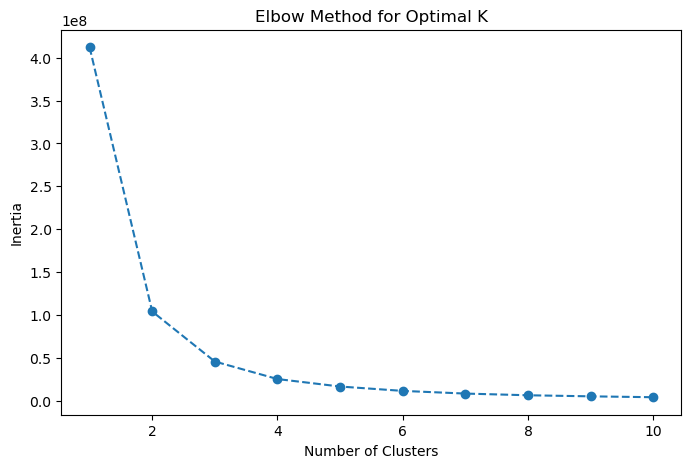

In [156]:
import matplotlib.pyplot as plt

# Let's say you have your segmentation_features DataFrame ready
# segmentation_features = ...

# List to store inertia values
inertia_values = []

# Range of cluster numbers to try (e.g., 1 to 10 clusters)
cluster_range = range(1, 11)

# Fit K-Means for each cluster count and calculate inertia
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(segmentation_features)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to find the elbow
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [158]:
segmentation_features['Cluster'] = kmeans.labels_

In [159]:
segmentation_features

,customer_id,transaction_count,coupons_claimed,coupons_burnt,branch_id,merchant_id,gender_name_Female,gender_name_Male,city_name_Alexandria,city_name_Aswan,...,city_name_Port Said,city_name_Qena,city_name_Shubra El-Kheima,city_name_Sohag,city_name_Suez,city_name_Tanta,city_name_Zagazig,cluster,Cluster,DBSCAN_Cluster
0,733,0.407599,0.0,0.0,7,7,True,False,False,True,...,False,False,False,False,False,False,False,0,1,-1
1,631,0.407599,0.0,0.0,5,9,True,False,False,False,...,False,False,False,False,False,False,False,0,6,-1
2,309,-1.359195,0.0,0.0,7,7,False,True,True,False,...,False,False,False,False,False,False,False,1,2,-1
3,695,-0.475798,0.0,0.0,2,18,True,False,False,True,...,False,False,False,False,False,False,False,0,1,-1
4,288,0.407599,0.0,0.0,6,15,False,True,False,False,...,False,False,False,False,False,False,False,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,776,2.616092,0.0,0.0,1,11,False,True,False,False,...,False,False,False,False,False,False,False,1,7,-1
4996,583,-0.475798,0.0,0.0,2,18,True,False,False,False,...,True,False,False,False,False,False,False,0,5,-1
4997,504,0.849298,0.0,0.0,2,18,True,False,False,False,...,False,False,False,False,False,False,False,0,0,-1
4998,876,0.407599,0.0,0.0,7,7,True,False,False,False,...,True,False,False,False,False,False,False,0,5,-1


In [160]:
#Average coupon usage frequency per cluster
coupon_usage = segmentation_features.groupby('Cluster')['transaction_count'].mean()

In [161]:
# Group by cluster and calculate mean values for key metrics
segment_analysis = segmentation_features.groupby('Cluster').agg({
    'transaction_count': 'mean',
    'coupons_claimed': 'mean',
    'coupons_burnt': 'mean',
    'gender_name_Female': 'mean',  # % of females in each cluster
    'gender_name_Male': 'mean',    # % of males in each cluster
    'city_name_Alexandria': 'mean', # % of customers from Alexandria in each cluster
    # Add other cities similarly...
})

print(segment_analysis)


         transaction_count  coupons_claimed  coupons_burnt  \
Cluster                                                      
0                 0.227861              0.0            0.0   
1                 0.022225              0.0            0.0   
2                 0.036734              0.0            0.0   
3                -0.096239              0.0            0.0   
4                -0.190289              0.0            0.0   
5                -0.013459              0.0            0.0   
6                -0.067172              0.0            0.0   
7                 0.339396              0.0            0.0   
8                -0.223398              0.0            0.0   
9                 0.081878              0.0            0.0   

         gender_name_Female  gender_name_Male  city_name_Alexandria  
Cluster                                                              
0                  0.597403          0.402597              0.000000  
1                  0.503356          0.496644

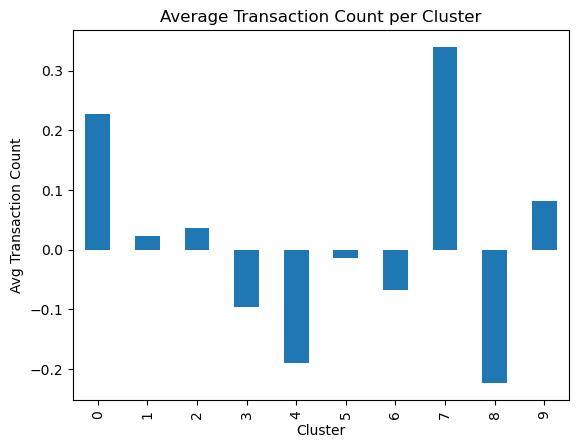

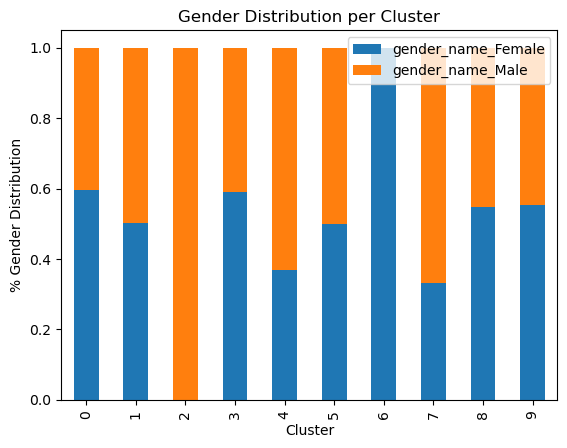

In [162]:
import matplotlib.pyplot as plt

# Plot average transaction count per cluster
segment_analysis['transaction_count'].plot(kind='bar', title='Average Transaction Count per Cluster')
plt.ylabel('Avg Transaction Count')
plt.show()

# Plot gender distribution per cluster
segment_analysis[['gender_name_Female', 'gender_name_Male']].plot(kind='bar', stacked=True, title='Gender Distribution per Cluster')
plt.ylabel('% Gender Distribution')
plt.show()


In [148]:
from sklearn.cluster import DBSCAN

In [149]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example values
dbscan.fit(segmentation_features)

DBSCAN()

In [150]:
dbscan_labels = dbscan.labels_
segmentation_features['DBSCAN_Cluster'] = dbscan_labels

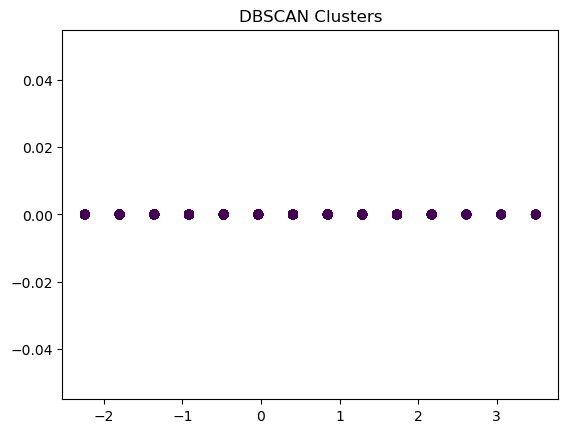

In [151]:
import matplotlib.pyplot as plt
plt.scatter(segmentation_features['transaction_count'], segmentation_features['coupons_claimed'], c=dbscan_labels)
plt.title('DBSCAN Clusters')
plt.show()

In [152]:
from sklearn.metrics import silhouette_score
silhouette_dbscan = silhouette_score(segmentation_features, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for DBSCAN: 0.07425654152878701


In [153]:
segmentation_features['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
-1    4995
 0       5
Name: count, dtype: int64

The results of your DBSCAN clustering indicate that the majority of your data points (4995 out of 5000) have been labeled as noise (-1), while only 5 points were grouped into cluster 0. This outcome suggests that DBSCAN might not have been the most effective model for your dataset, possibly due to inappropriate parameter selection for eps (the radius for grouping points) or min_samples (the minimum number of points required to form a cluster).